In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import utils

In [2]:
def read_results(prefix):

    Res = utils.RetrievalResults(
        prefix=prefix, m_set='J1226_A', w_set='J1226', load_posterior=True
        )
    d_spec  = Res._load_object('d_spec', bestfit_prefix=False)
    LogLike = Res._load_object('LogLike', bestfit_prefix=True)
    sigma   = Res.get_mean_scaled_uncertainty()

    return Res, d_spec, LogLike, sigma

name = 'Luhman 16B'
Res_vdW, d_spec_vdW, LogLike_vdW, sigma_vdW \
    = read_results(prefix='../retrieval_outputs/fiducial_J_B_ret_36_vdW/test_')
Res_pRT_opa, d_spec_pRT_opa, LogLike_pRT_opa, sigma_pRT_opa \
    = read_results(prefix='../retrieval_outputs/fiducial_J_B_ret_36_pRT_opa/test_')
Res_OtF, d_spec_OtF, LogLike_OtF, sigma_OtF \
    = read_results(prefix='../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_')

#Res_OtF, d_spec_OtF, LogLike_OtF, sigma_OtF \
#    = read_results(prefix='../retrieval_outputs/fiducial_J_A_ret_15_1column_n1000/test_')

  analysing data from ../retrieval_outputs/fiducial_J_B_ret_36_vdW/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1394790.2382434993
1394770.8278044632
1394770.8278044632
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_36_pRT_opa/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1394870.696162038
1394855.3005628507
1394855.3005628507
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidenc

## Potassium fits

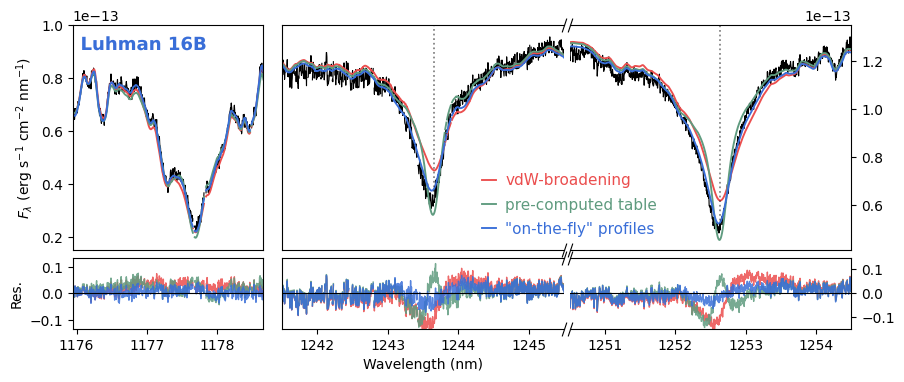

In [3]:
scale = 1e-13

color_m_pRT_opa = '#5F9B7F'
color_m_vdW = '#EB4E4E'
color_m_OtF = '#396ED8'
#color_m_OtF = '#FF622E'

lw_d = 0.8
lw_m = 1.0
res_alpha = 0.85

width = 4
xlim = [
    1177.3 + np.array([-1,1])*width/2*25/37, 
    1243.5 + np.array([-1,1])*width/2, 
    1252.5 + np.array([-1,1])*width/2
]
ylim_res = [
    (-0.08,0.08), (-0.15,0.15), (-0.15,0.15), 
]
ylim = [
    (0.15e-13,1.0e-13), (0.41e-13,1.35e-13), (0.41e-13,1.35e-13), 
    #(0.15e-13,0.85e-13), (0.41e-13,1.0e-13), (0.41e-13,1.0e-13), 
]

labels = [
    #r'Parameterised $\gamma_W(P,T)$ and $d(P,T)$', 
    '"on-the-fly" profiles', 
    'pre-computed table', 
    'vdW-broadening', 
]


fig = plt.figure(figsize=(9,3.8))
gs = fig.add_gridspec(
    nrows=2, ncols=4, hspace=0.05, wspace=0.03, 
    height_ratios=[0.76,0.24], width_ratios=[0.25,0.01,0.37,0.37]
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[0,2]), 
    fig.add_subplot(gs[0,3]), 
])
ax_res = np.array([
    fig.add_subplot(gs[1,0]), 
    fig.add_subplot(gs[1,2]), 
    fig.add_subplot(gs[1,3]), 
])

for h, ax_h in enumerate(ax):

    for i in range(d_spec_OtF.n_orders):
        for j in range(d_spec_OtF.n_dets):

            # Data
            wave_ij = d_spec_OtF.wave[i,j]        
            if not ((wave_ij<xlim[h][1]) & (wave_ij>xlim[h][0])).any():
                continue
            ax_h.plot(wave_ij, d_spec_OtF.flux[i,j], c='k', lw=lw_d, zorder=-1)
            
            # Models
            label_ij = labels[2] if j==1 else None
            ax_h.plot(wave_ij, LogLike_vdW.m_flux_phi[i,j], c=color_m_vdW, lw=lw_m*1.35, label=label_ij)
            ax_res[h].plot(
                wave_ij, (d_spec_vdW.flux[i,j]-LogLike_vdW.m_flux_phi[i,j])/scale, 
                c=color_m_vdW, lw=lw_m, alpha=res_alpha
                )
            
            label_ij = labels[1] if j==1 else None
            ax_h.plot(wave_ij, LogLike_pRT_opa.m_flux_phi[i,j], c=color_m_pRT_opa, lw=lw_m*1.35, label=label_ij)
            ax_res[h].plot(
                wave_ij, (d_spec_pRT_opa.flux[i,j]-LogLike_pRT_opa.m_flux_phi[i,j])/scale, 
                c=color_m_pRT_opa, lw=lw_m, alpha=res_alpha
                )
            
            label_ij = labels[0] if j==1 else None
            ax_h.plot(wave_ij, LogLike_OtF.m_flux_phi[i,j], c=color_m_OtF, lw=lw_m*1.35, label=label_ij)
            ax_res[h].plot(
                wave_ij, (d_spec_OtF.flux[i,j]-LogLike_OtF.m_flux_phi[i,j])/scale, 
                c=color_m_OtF, lw=lw_m, alpha=res_alpha
                )
            
    utils.indicate_ghost(ax[h], v_bary=d_spec_OtF.v_bary, show_text=False)
    utils.indicate_ghost(ax_res[h], v_bary=d_spec_OtF.v_bary, show_text=False)
    
    ax_h.set(xlim=xlim[h], xticks=[], ylim=ylim[h])

    ylim_h = ax_h.get_ylim()
    h_ratio = gs.get_height_ratios()
    h_ratio = h_ratio[1]/h_ratio[0]
    ylim_res_h = (-np.diff(ylim_h)/scale/2 * h_ratio, +np.diff(ylim_h)/scale/2 * h_ratio)

    ax_res[h].set(xlim=xlim[h], ylim=ylim_res_h)
    ax_res[h].axhline(0, lw=ax_res[h].spines['left'].get_lw(), c='k')


for i, wn_i in enumerate([8041.38112, 7983.67489]):
    w_i = 1e7/wn_i * (1+Res_OtF.bestfit_params['J1226_A']['rv']/3e5)
    ymin = d_spec_OtF.flux.flatten()[np.argmin(np.abs(d_spec_OtF.wave.flatten()-w_i))]

    ax[i+1].plot(
        [w_i]*2, [ymin,ax[i+1].get_ylim()[1]], lw=lw_m*1.25, c='k', ls=':', alpha=0.5
        )

ax[0].annotate(
    name, xy=(0.04,0.95), xycoords='axes fraction', 
    ha='left', va='top', c=color_m_OtF, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )
ax[2].legend(
    loc='lower center', bbox_to_anchor=(0.0,0.0), 
    labelcolor='linecolor', frameon=False, handlelength=0.9, 
    handletextpad=0.6, labelspacing=0.6, prop={'size':11}, 
    )

ax[0].set(ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$')
ax_res[0].set(ylabel='Res.')
ax_res[1].set(xlabel=r'Wavelength (nm)')

ax[1].set(yticks=[])
ax_res[1].set(yticks=[])

ax[1].spines['right'].set_visible(False); ax[2].spines['left'].set_visible(False)
ax_res[1].spines['right'].set_visible(False); ax_res[2].spines['left'].set_visible(False)

ax[2].yaxis.tick_right()
ax_res[2].yaxis.tick_right()


d = 3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=0.8, clip_on=False
    )
ax[1].plot([1, 1], [1, 0], transform=ax[1].transAxes, **kwargs)
ax_res[1].plot([1, 1], [1, 0], transform=ax_res[1].transAxes, **kwargs)
ax[2].plot([0, 0], [1, 0], transform=ax[2].transAxes, **kwargs)
ax_res[2].plot([0, 0], [1, 0], transform=ax_res[2].transAxes, **kwargs)

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.93, right=0.945)
plt.savefig('./plots/J_band_K_doublet.pdf')
plt.show()

## Opacity treatment

In [4]:
from retrieval_base.auxiliary_functions import pickle_load
Line = pickle_load('../retrieval_outputs/Line_K_order5.pkl')

Line.wave_range_micron = Line.wave_range_micron[[5]]

Chem_OtF = Res_OtF._load_object('Chem')

In [5]:
params = Res_OtF.bestfit_params['J1226_A'].copy()
params2 = params.copy()
params2['A_d_0_H2'] = 0.
params2['A_d_1_H2'] = 0.
params2['A_d_0_He'] = 0.
params2['A_d_1_He'] = 0.

In [6]:
mask_wave = (Line.Interp.order_indices==0)
wave = (Line.Interp.wave_micron[mask_wave]*1e3)

Line(
    params=params, 
    #temperature=PT_B.temperature, 
    temperature=np.ones_like(Line.pressure)*1500., 
    mass_fractions={
        'K': np.ones_like(Line.pressure), 
        'H2': Chem_OtF.mass_fractions['H2'], 
        'He': Chem_OtF.mass_fractions['He'], 
        'MMW': Chem_OtF.mass_fractions['MMW'], 
        #'H2': 0.85*np.ones_like(Line_i.pressure), 
        #'He': 0.15*np.ones_like(Line_i.pressure), 
        }
    )

#Line.lines_to_skip = 'non-custom' #'custom'
Line.lines_to_skip = 'custom'
opa_others = Line.get_line_opacity(
    wave_micron=wave*1e-3, pressure=Line.pressure
    )

Line.lines_to_skip = 'non-custom'
opa = Line.get_line_opacity(
    wave_micron=wave*1e-3, pressure=Line.pressure
    )

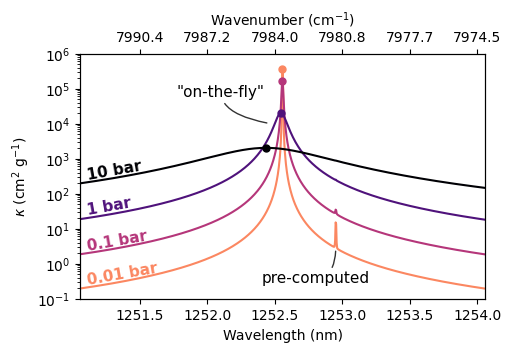

In [9]:

#cmap = plt.get_cmap('magma')
cmap = plt.get_cmap('magma_r')

fig, ax = plt.subplots(figsize=(5,3.5))

mask_P = (Line.pressure>=1e-2) & (Line.pressure<=1e1)
mask_P = np.isin(Line.pressure, 10**np.array([-2,-1,0.,1]))
#labels = [
#    '0.01', '0.03', '0.1', '0.31', '1', '3.16', '10'
#    ]
labels = [
    '0.01', '0.1', '1', '10', '100'
    ]

for i, (opa_i, opa_others_i, P_i) in enumerate(
    zip(opa.T[mask_P], opa_others.T[mask_P], Line.pressure[mask_P])
    ):

    color_i = cmap((i+1)/mask_P.sum())

    #ax.plot(wave, opa_others_i, lw=0.5, c=color_i, ls='--', alpha=0.5)
    ax.plot(wave, opa_i, lw=1.5, c=color_i)
    ax.plot(wave[np.argmax(opa_i)], opa_i[np.argmax(opa_i)], 'o', markersize=5, c=color_i)

    x = 1251.1
    y = 10**(np.interp(x, wave, np.log10(opa_i))+0.1)
    ax.annotate(
        labels[i]+' bar', xy=(x, y), c=color_i, rotation=10, 
        fontweight='bold', fontsize=11,
    )

'''
for i, opa_i in enumerate(opa2.T[mask_P]):

    color_i = cmap((i+1)/mask_P.sum())

    #ax.plot(wave, opa_others_i, lw=0.5, c=color_i, ls='--', alpha=0.5)
    ax.plot(wave, opa_i, lw=1.5, c=color_i, ls=(0,(3,1.5)), zorder=-1, alpha=0.7)
'''

ax.annotate(
    'pre-computed', xy=(1252.95,3), xytext=(1252.8,0.4), c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)

ax.annotate(
    '"on-the-fly"', xy=(1252.47,1e4), xytext=(1252.1,8e4), c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-10', 
        'shrinkA':1, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)

xlim = 1e7/Line.nu_0[0] + np.array([-1,1])*1.5
ylim = (1e-1,1e6)
ax.set(
    yscale='log', ylim=ylim, ylabel=r'$\kappa\ (\mathrm{cm^2\ g^{-1}})$', 
    xticks=np.arange(1251,1255,0.5), xlim=xlim, xlabel=r'Wavelength (nm)', 
    )

ax_wn = ax.twiny()
ax_wn.set(
    xticks=ax.get_xticks(), 
    xticklabels=['{:.1f}'.format(1e7/w_i) for w_i in ax.get_xticks()]
    )
ax_wn.set(xlim=xlim, xlabel=r'Wavenumber ($\mathrm{cm^{-1}}$)')

plt.subplots_adjust(left=0.15, right=0.96, top=0.86, bottom=0.16)
plt.savefig('./plots/J_band_opacity_treatment.pdf')
plt.show()